In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
data=pd.read_csv('winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Checking for Nan values

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#no nan value or missing value 

In [8]:
 data.rename (columns={'fixed acidity':  'fixed_acidity', 
                       
                       'citric acid':  'citric_acid',
                       
                       'volatile acidity': 'volatile_acidity',
                       
                       'residual sugar': 'residual_sugar',
                       
                       'free sulfur dioxide':'free_sulfur_dioxide',
                       
                       'total sulfur dioxide':'total_sulfur_dioxide' },inplace=True)

In [9]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [12]:
#Graphic Anlysis

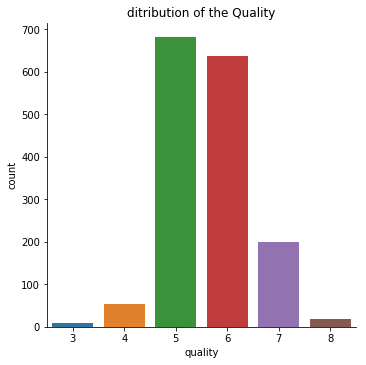

In [13]:
sns.catplot(x='quality', data=data, 
kind= 'count');

plt.title('ditribution of the Quality');

In [14]:
#here the quality of wine that appeats most in the data set is in 5

In [15]:
#Correlation Analysis

In [16]:
data.corr()['quality'].sort_values()

volatile_acidity       -0.390558
total_sulfur_dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free_sulfur_dioxide    -0.050656
residual_sugar          0.013732
fixed_acidity           0.124052
citric_acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [17]:
data_cor =data.drop(['fixed_acidity','volatile_acidity','density','residual_sugar','chlorides','total_sulfur_dioxide'],axis=1)

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\VIV\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\VIV\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


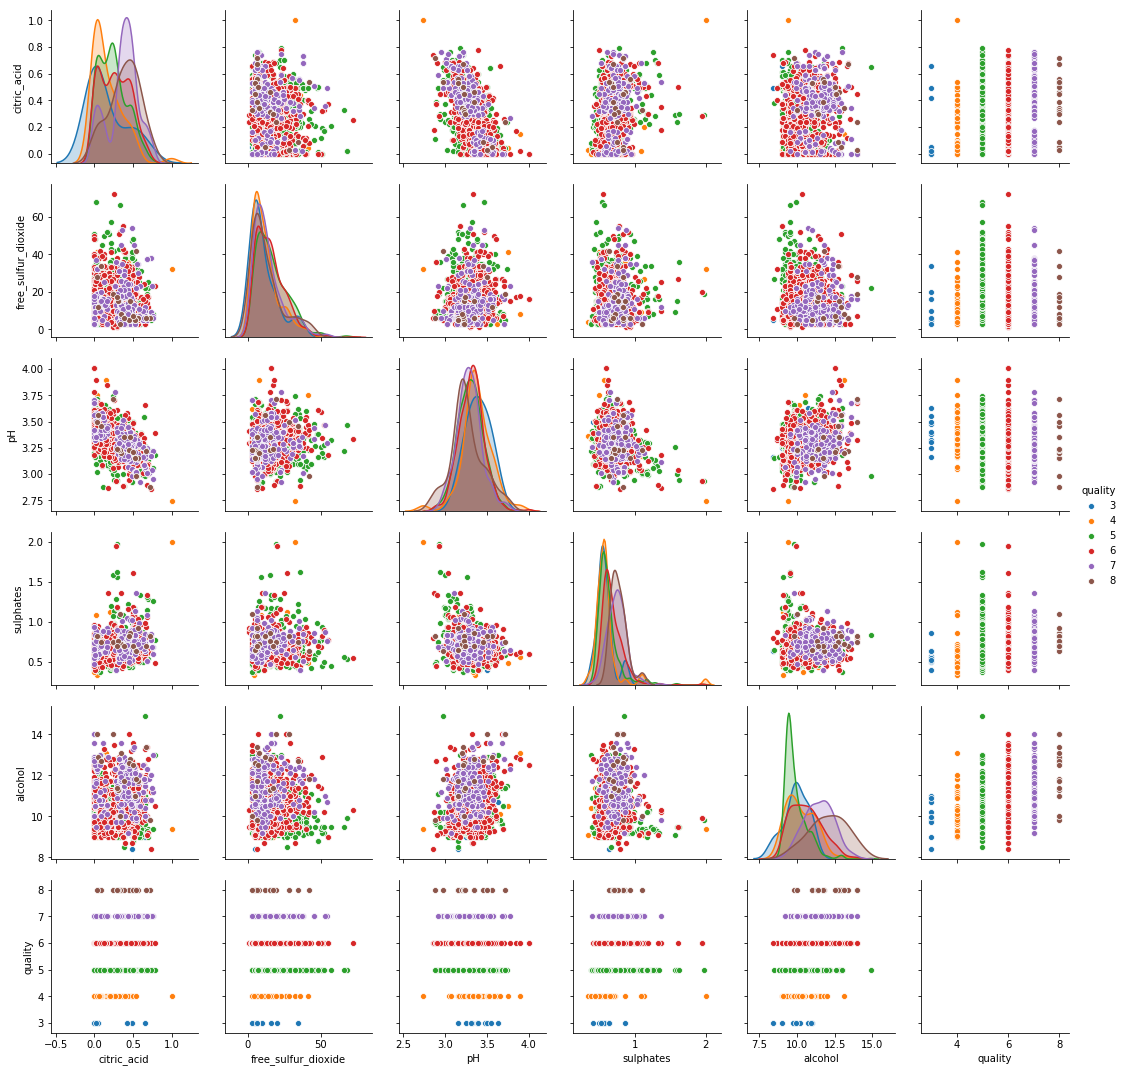

In [18]:
sns.pairplot(data_cor,hue ='quality');

In [19]:
#focusing on the features in the data set that gives a postive correlation we see
#both distribution of single variables on the diagonal with respect to the quality


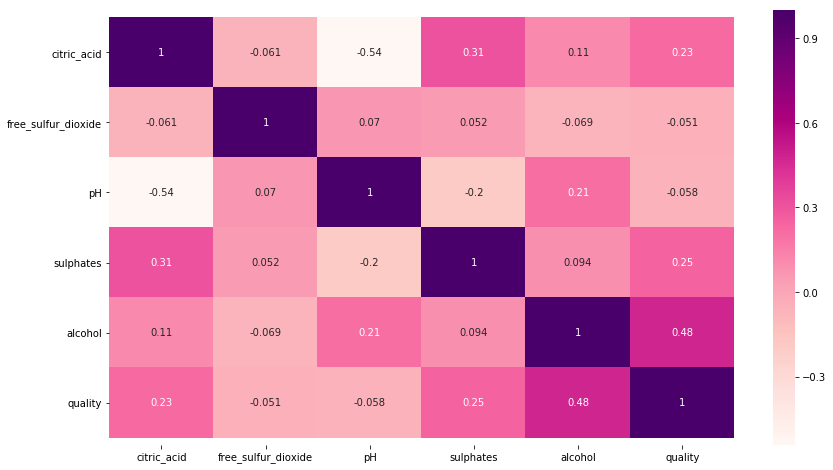

In [20]:

plt.figure(figsize=(14,8))
ax =sns.heatmap(data_cor.corr(),
annot =True,cmap='RdPu')
bottom,top =ax.get_ylim()
ax.set_ylim(bottom + 0.1, top -0.1);

In [21]:
#from the correlation analysis,the attributes in the dataset that have a postive correlation 
#with the quality are:PH,sulphates,free_sulfur_dioxide,citric_acid,alcohol


In [22]:
#Each attributes is analysed below

In [23]:
data['pH'].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [24]:
data['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [25]:
data['free_sulfur_dioxide'].describe()

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free_sulfur_dioxide, dtype: float64

In [26]:
data['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [27]:
#Removing the quality column

In [28]:
data.iloc[:, :11].head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


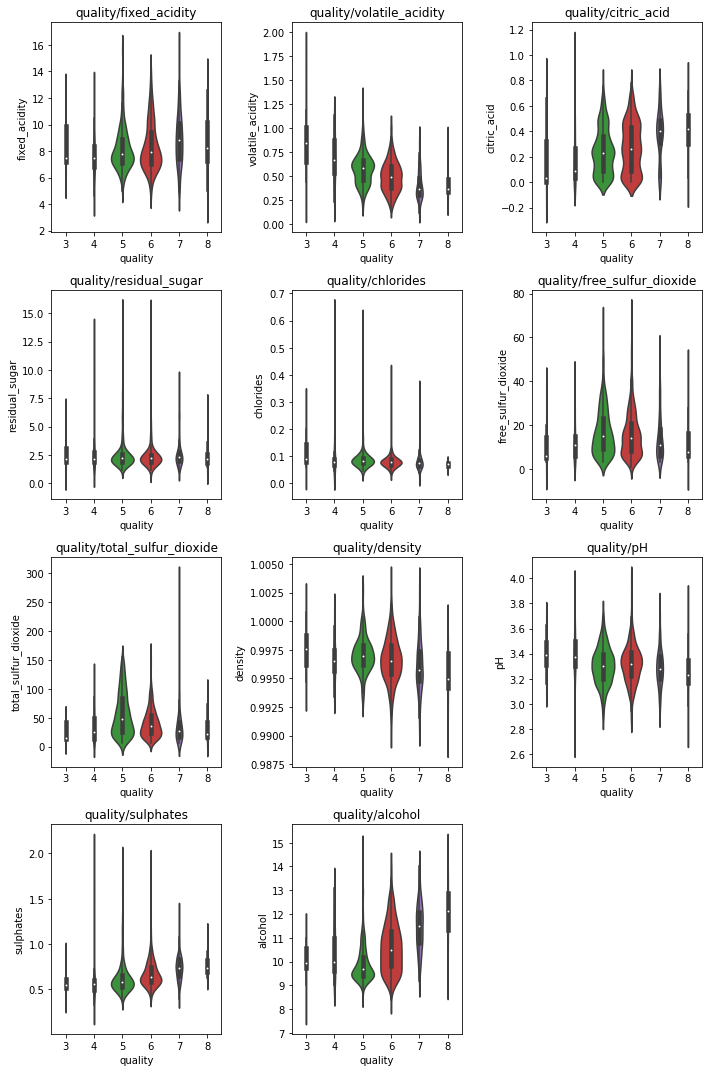

In [29]:
plt.figure(figsize=(10,15))

for pl,col in enumerate(list(data.iloc[:,:11].columns.values)):
    plt.subplot(4,3,pl+1)
    sns.violinplot(y= data[col],x='quality',data=data, scale='count')
    plt.title(f'quality/{col}')
    plt.tight_layout()

In [30]:
#This scatter plot with a regression line,easily showing the correlation,distribution,and outliers

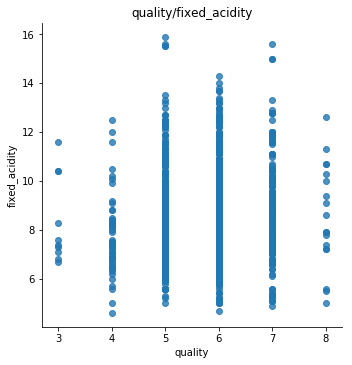

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


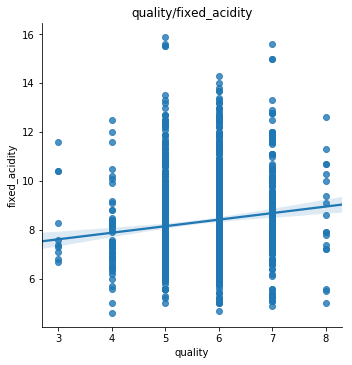

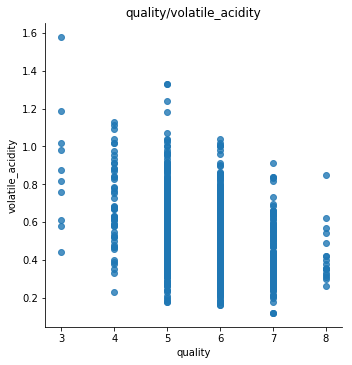

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


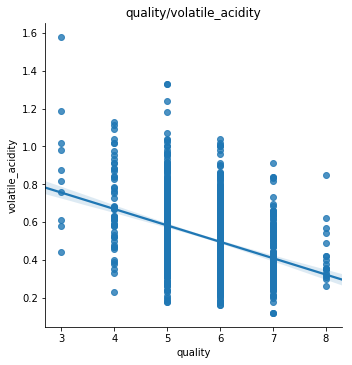

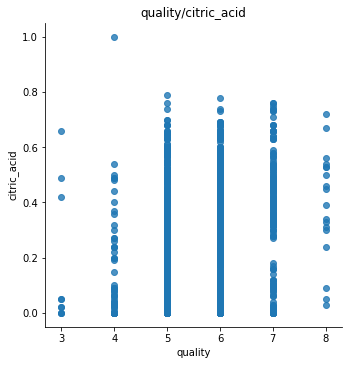

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


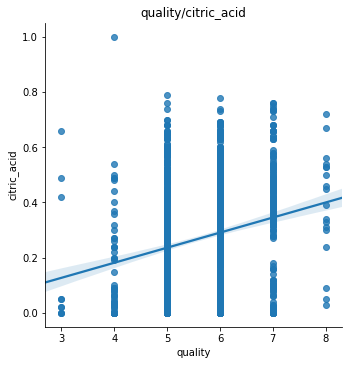

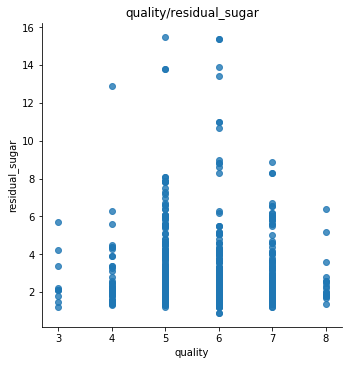

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


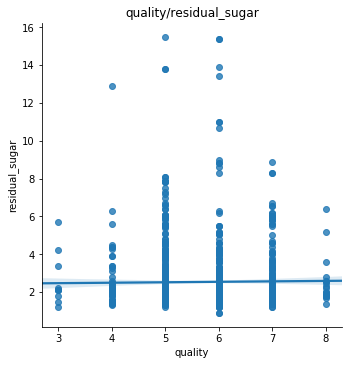

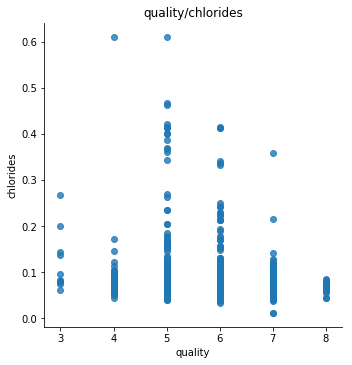

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


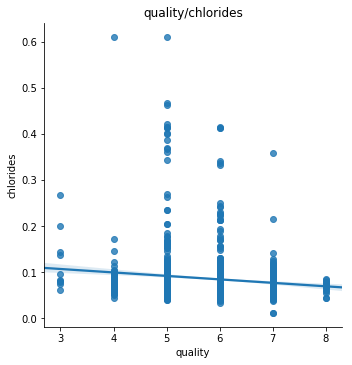

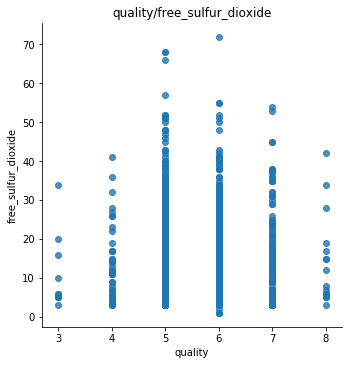

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


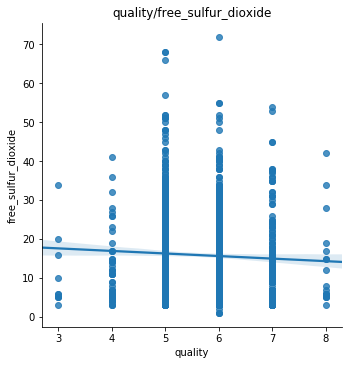

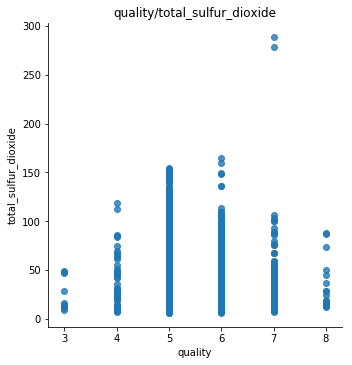

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


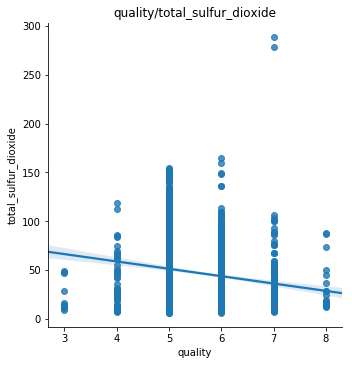

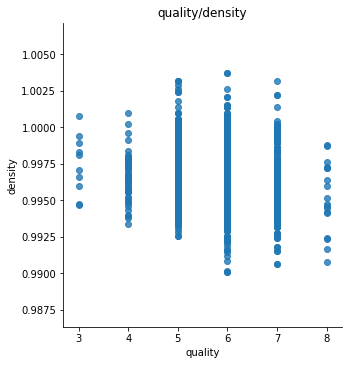

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


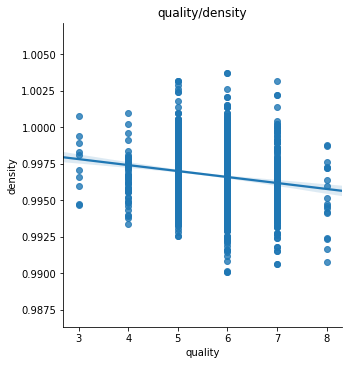

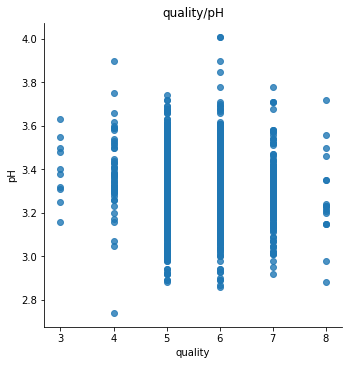

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


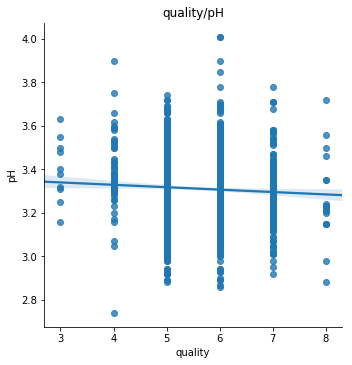

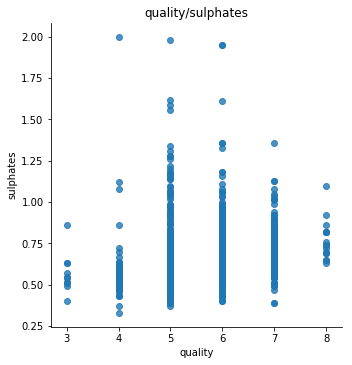

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


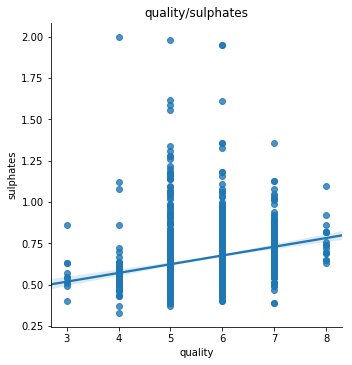

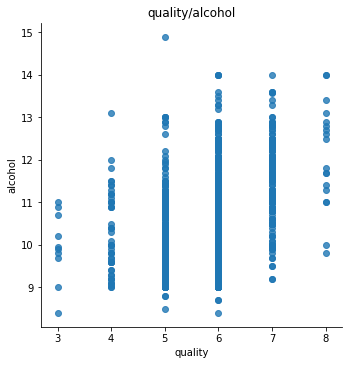

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


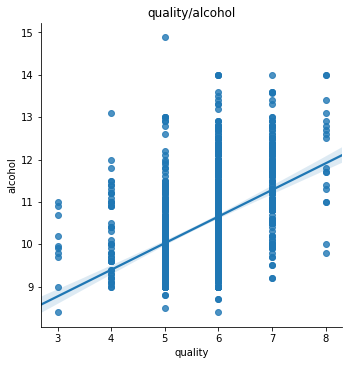

In [31]:
for col in (data.iloc[:,:11].columns.values):
    
    sns.lmplot(x='quality',y=col,data=data, fit_reg=False)
    
    plt.title(f'quality/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close()
   
    
    sns.lmplot(x='quality',y=col,data=data)
    
    plt.title(f'quality/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close()
    
    print(' ')
   

In [32]:
#from both plots,the violin plot and the lm plot, we can see the correlation between the different attributes and quality

In [33]:
#setting the condition for good and bad rating

In [34]:
condition =[(data['quality']>6),(data['quality']<=4)]

rating =['good','bad']

In [35]:
data['rating'] =np.select(condition,rating,default='average')
data.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [36]:
data.head(25)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,average


In [37]:
#The swarm and violin plot shows how much of data is distributed into 'good', 'average' ,and 'bad'

C:\Users\VIV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


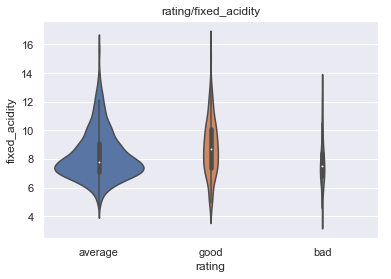

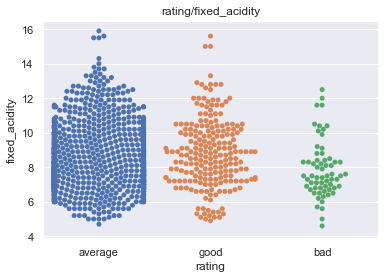

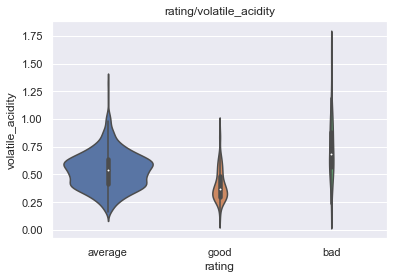

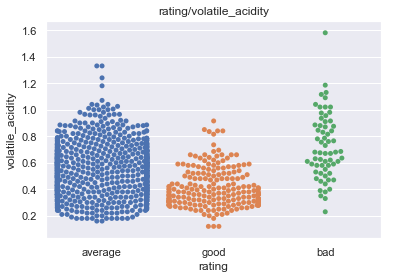

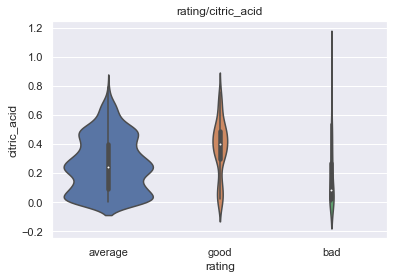

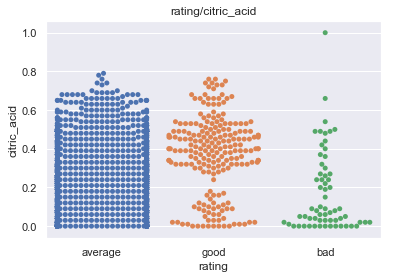

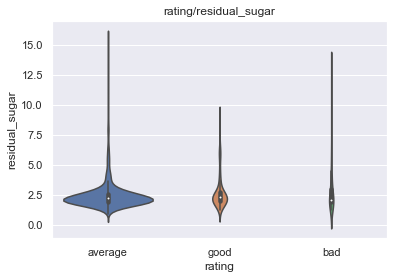

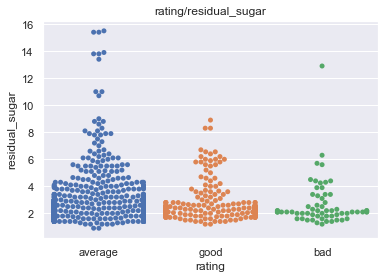

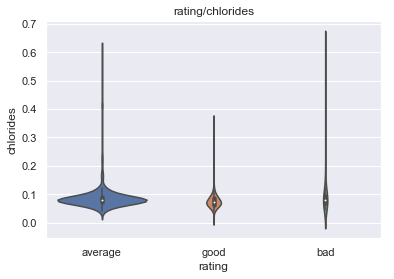

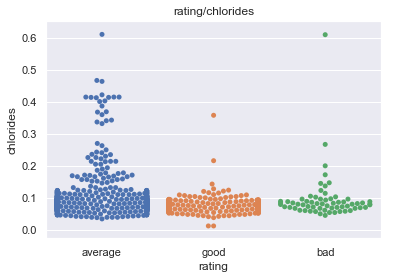

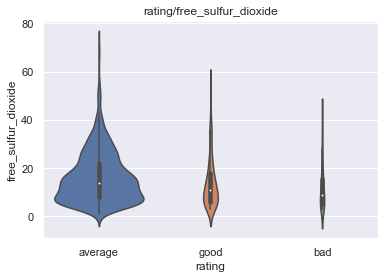

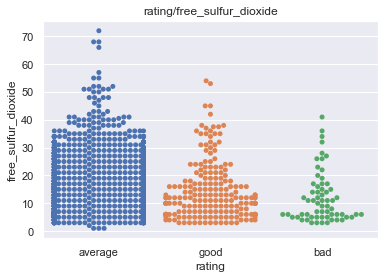

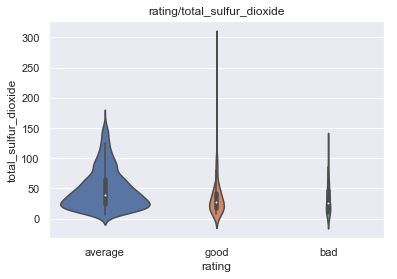

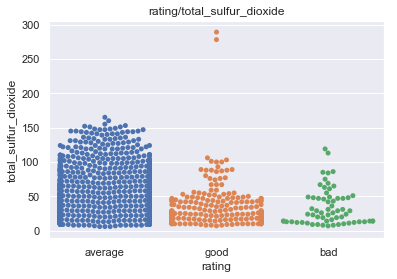

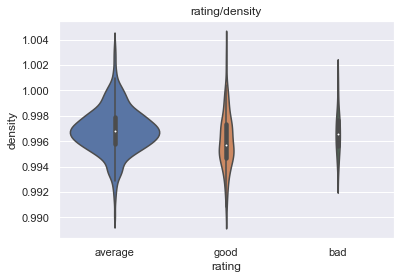

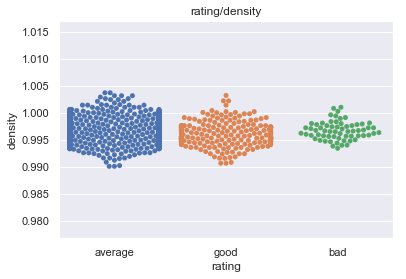

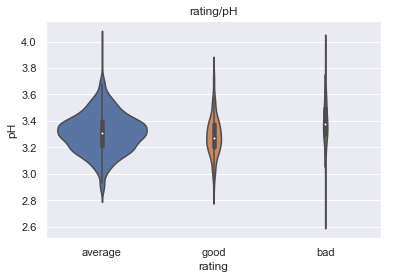

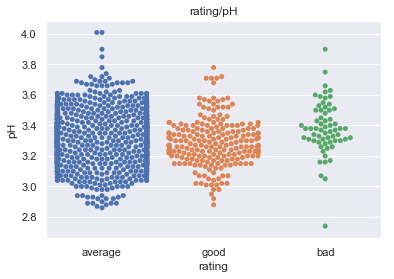

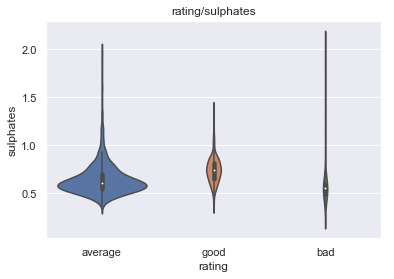

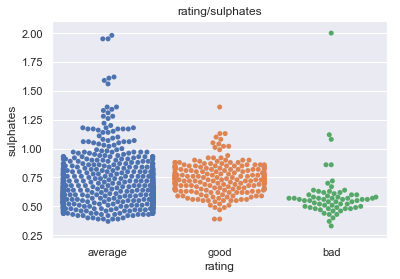

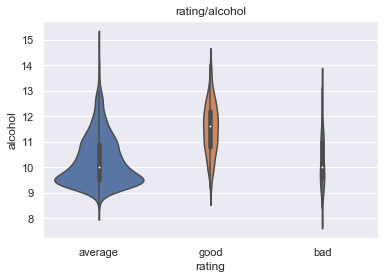

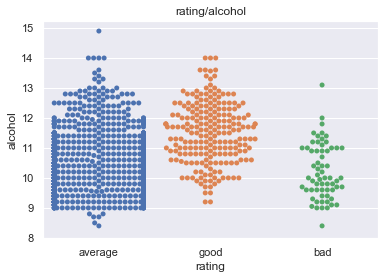

In [38]:
for col in data.iloc[:,:11].columns.values:
    
    
    sns.set()
    sns.violinplot(y= col, x='rating',              
    data= data,scale='count')
    plt.title(f'rating/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close()
               
               
               
    sns.set()
    sns.swarmplot(x='rating' ,y=col,
     data=data)
    plt.title(f'rating/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close()
    

    print('  ') 

In [39]:
data[[('rating'),('quality')]].head(25)

,rating,quality
0,average,5
1,average,5
2,average,5
3,average,6
4,average,5
5,average,5
6,average,5
7,good,7
8,good,7
9,average,5


In [40]:
data.groupby('rating')['quality'].value_counts()

rating   quality
average  5          681
         6          638
bad      4           53
         3           10
good     7          199
         8           18
Name: quality, dtype: int64

In [41]:
#Data fitting and transformation

In [42]:
bins =(2,4,9)
group_names = ['bad','good']
data['quality'] =pd.cut(data['quality'], bins = bins, labels =group_names)

In [43]:
data.head(25)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,good,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,good,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,good,average


In [44]:
data[[('rating'),('quality')]].head(25)

,rating,quality
0,average,good
1,average,good
2,average,good
3,average,good
4,average,good
5,average,good
6,average,good
7,good,good
8,good,good
9,average,good


In [45]:
#maps all good value to 1 and all bad values to 0 in the quality column

In [46]:
dfL  = np.array(data['quality'])

dfL  =pd.DataFrame(dfL)


data['quality'] = dfL.apply(lambda x: x.map({'good':1,'bad':0}))

In [47]:
data.head(30)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1,average


In [48]:
data[[('rating'),('quality')]].head(25)

,rating,quality
0,average,1
1,average,1
2,average,1
3,average,1
4,average,1
5,average,1
6,average,1
7,good,1
8,good,1
9,average,1


In [49]:
#setting the values of X and Y

In [50]:
X = data [['alcohol','density','sulphates','pH','free_sulfur_dioxide','citric_acid']]
y = data['quality']

In [51]:
#X_tr is training data for x
#X_t is testing data for x
#y_tr is training data for y
#y_t is testing data for y

In [52]:
X_tr,X_t,y_tr,y_t = train_test_split(X,y)

In [53]:
X_tr.shape,X_t.shape

((1199, 6), (400, 6))

In [54]:
std=StandardScaler()


X_tr=std.fit_transform(X_tr)
X_t=std.fit_transform(X_t)

In [55]:
#ML Appliction,Data Modelling:PRESDICTING quality

In [56]:
#The function below will be used to measure the accurcy of the model

In [57]:
def generateClassificationReport_Tr(y_true,y_pred):
    '''Train data accuracy tester'''
    print(classification_report(y_true,y_pred));
    print(confusion_matrix(y_true,y_pred));
    print('\n\nTrain Accuracy is:', 
          
          
            round(100*accuracy_score(y_true,y_pred),3),'%\n');
    
    
def generateClassificationReport_Tr(y_true,y_pred):
    '''Test data accuracy tester'''
    print(classification_report(y_true,y_pred));
    print(confusion_matrix(y_true,y_pred));
    print('\n\nTest Accuracy is:', 
          
          
             round(100*accuracy_score(y_true,y_pred),3),'%\n');
        
        

In [58]:
#Both the train and test will pass through the models this is done to check howccurate the models are

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=7,shuffle=True,stratify=y)

C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [70]:
#Logistic Regression

In [71]:
logr =LogisticRegression(max_iter=1000);
logr.fit(X_tr,y_tr);


C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
#Train Data

ytr_pred = logr.predict(X_tr)
def generateClassificationReport_Tr(y_true,y_pred):
    '''Train data accuracy tester'''
    print(classification_report(y_true,y_pred));
    print(confusion_matrix(y_true,y_pred));
    print('\n\nTrain Accuracy is:', 
          
          
            round(100*accuracy_score(y_true,y_pred),3),'%\n');
    
   

In [84]:
#Data Train

ytr_pred = logr.predict(X_tr)
generateClassificationReport_Tr(y_tr,ytr_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.96      1.00      0.98      1153

   micro avg       0.96      0.96      0.96      1199
   macro avg       0.48      0.50      0.49      1199
weighted avg       0.92      0.96      0.94      1199

[[   0   46]
 [   0 1153]]


Train Accuracy is: 96.163 %



C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [109]:
def generateClassificationReport_Tr(y_true,y_pred):
    '''Test data accuracy tester'''
    print(classification_report(y_true,y_pred));
    print(confusion_matrix(y_true,y_pred));
    
    print('\n\nTest Accuracy is:', 
          
          
             round(100*accuracy_score(y_true,y_pred),3),'%\n');
        


In [116]:
#Test Data


yt_pred = logr.predict(X_t)
classification_report(y_t,yt_pred)

print('\n\nTest Accuracy is:', 
          
          
        round(100*accuracy_score(y_t,yt_pred),3),'%\n');
   



Test Accuracy is: 95.75 %



C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
#Random Forest

In [118]:
rfc =RandomForestClassifier(n_estimators=1000);
rfc.fit(X_tr,y_tr);


In [124]:
#Train Data

ytr_pred = rfc.predict(X_tr)
generateClassificationReport_Tr(y_tr,ytr_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00      1153

   micro avg       1.00      1.00      1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

[[  46    0]
 [   0 1153]]


Train Accuracy is: 100.0 %



In [130]:
#Test Data

ytr_pred = rfc.predict(X_t);
classification_report(y_t,yt_pred);

print('\n\nTest Accuracy is:', 
          
          
        round(100*accuracy_score(y_t,yt_pred),3),'%\n');





Test Accuracy is: 95.75 %



C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [131]:
#Decision Tree

In [132]:
dtc = DecisionTreeClassifier()
dtc.fit(X_tr,y_tr);

In [134]:
#Train Data

ytr_pred = dtc.predict(X_tr)
generateClassificationReport_Tr(y_tr,ytr_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00      1153

   micro avg       1.00      1.00      1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

[[  46    0]
 [   0 1153]]


Train Accuracy is: 100.0 %



In [138]:
#Test Data

yt_pred = dtc.predict(X_t)
classification_report(y_t,yt_pred)

print('\n\nTest Accuracy is:', 
          
          
        round(100*accuracy_score(y_t,yt_pred),3),'%\n');




Test Accuracy is: 93.75 %



In [139]:
#Support Vector Classifier

In [140]:
svc =SVC()
svc.fit(X_tr,y_tr);

In [142]:
#Train Data

ytr_pred = svc.predict(X_tr)
generateClassificationReport_Tr(y_tr,ytr_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.96      1.00      0.98      1153

   micro avg       0.96      0.96      0.96      1199
   macro avg       0.48      0.50      0.49      1199
weighted avg       0.92      0.96      0.94      1199

[[   0   46]
 [   0 1153]]


Train Accuracy is: 96.163 %



C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
#Test Data

yt_pred = svc.predict(X_t)
classification_report(y_t,yt_pred)

print('\n\nTest Accuracy is:', 
          
          
        round(100*accuracy_score(y_t,yt_pred),3),'%\n');




Test Accuracy is: 95.75 %



C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\VIV\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#Lots of the models used yielded result close to 10o%,but logistic regression,random forest and support vector best accuracy of  all